In [1]:
#Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy import stats # For the normal and probility dist chart 
from scipy.stats import norm
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('C:/Users/Samu_D/Data Engineering Coursework/newfld/asteroid2.csv', low_memory=False)

In [4]:
df.head()

,full_name,a,e,g,i,om,w,q,ad,per_y,...,rot_per,gm,bv,ub,ir,spec_b,spec_t,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589


In [5]:
#df.spec_T.value_counts().sort_values(ascending=False).head()
# Remove the .head() function above to see the massive amount of classes that spec_B and spec_T contain
# Therefore I am not going to one-hot encode the values

In [6]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(12)

,Total,Percent
ir,6707,1.000000
gm,6696,0.998360
extent,6694,0.998062
g,6593,0.983003
spec_t,5732,0.854629
ub,5732,0.854629
bv,5690,0.848367
spec_b,5349,0.797525
rot_per,2432,0.362606
albedo,627,0.093484


In [7]:
# Creating our main Dataset

columns=['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'h', 'diameter', 'albedo', 'rot_per', 'moid']

df = df[columns]
# Columns dropped from the original dataset: 
# [extent, GM, IR, BV, UB, G](Because many values were missing)
# [spec_B, spec_T](Contained too many variables(34 each!!!) to apply one hot encoding)
# [neo, pha, class, condition_code](Factors that dont affect diameter))

df = df.dropna(subset=["diameter", "rot_per"]) # Removing rows with null diameter
df = df[pd.to_numeric(df['diameter'], errors='coerce').notnull()] # Removing non numeric values
df = df.interpolate() # Substituting Variables. Not a good idea :/ I know
df = df.round(decimals=5) # Rounds Float Values
# Scaling has been performed later
df = df.astype(float)
df = df.reset_index() # Resetting dataframe indexes  

df.head()

,index,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,h,diameter,albedo,rot_per,moid
0,0,2.76917,0.07601,10.59407,80.30553,73.59769,2.55868,2.97965,4.60820,8822.0,1002.0,3.34,939.400,0.0900,9.07417,1.59478
1,1,2.77247,0.23034,34.83623,173.08006,310.04886,2.13386,3.41107,4.61644,72318.0,8490.0,4.13,545.000,0.1010,7.81320,1.23324
2,2,2.66915,0.25694,12.98892,169.85276,248.13863,1.98333,3.35497,4.36081,72684.0,7104.0,5.33,246.596,0.2140,7.21000,1.03454
3,3,2.36142,0.08872,7.14177,103.81080,150.72854,2.15191,2.57093,3.62884,24288.0,9325.0,3.20,525.400,0.4228,5.34213,1.13948
4,4,2.57425,0.19109,5.36699,141.57660,358.68761,2.08232,3.06617,4.13032,63431.0,2861.0,6.85,106.699,0.2740,16.80600,1.09589


In [8]:
df.describe()

,index,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,h,diameter,albedo,rot_per,moid
count,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000
mean,2613.189638,2.755103,0.149601,9.514046,175.192796,175.918770,2.351075,3.159131,4.661891,30052.641600,2248.224346,11.543473,30.769267,0.188993,22.985014,1.369615
std,1864.817751,0.669114,0.085880,6.801498,102.646064,103.783138,0.614337,0.832346,2.229150,10731.934851,525.895548,1.771010,41.018140,0.146890,77.758954,0.604904
min,0.000000,0.832030,0.001140,0.052950,0.000730,0.029770,0.139980,1.143440,0.758960,7629.000000,51.000000,3.200000,0.300000,0.008000,1.100000,0.003150
25%,1012.750000,2.363837,0.092155,4.319108,88.562635,85.918430,1.973027,2.735978,3.634420,23344.000000,1965.000000,10.417500,7.855750,0.065000,5.178400,0.984410
50%,2212.500000,2.665280,0.137770,8.025640,168.794760,170.195705,2.252155,3.073200,4.351335,29754.500000,2233.000000,11.800000,16.374500,0.170000,8.649500,1.270770
75%,4036.500000,3.026637,0.190912,13.154220,261.223453,267.899695,2.661058,3.416670,5.265620,37843.000000,2515.250000,12.800000,36.825500,0.266250,15.853000,1.666663
max,6706.000000,20.392730,0.889900,64.006900,359.915760,359.921010,8.778460,32.007000,92.091870,72684.000000,9325.000000,20.200000,939.400000,1.000000,1641.000000,7.795830


In [9]:
df = df[df.a < 20]
df = df[df.q < 6]
df = df[df.n_obs_used < 6000]
df = df[df.per_y < 15]
df = df[df.diameter < 400]
df = df.reset_index()

In [10]:
corr_matrix = df.corr()
corr_matrix["diameter"].sort_values(ascending=False).head()

diameter    1.000000
data_arc    0.599525
a           0.415329
per_y       0.398676
moid        0.393276
Name: diameter, dtype: float64

<AxesSubplot:>

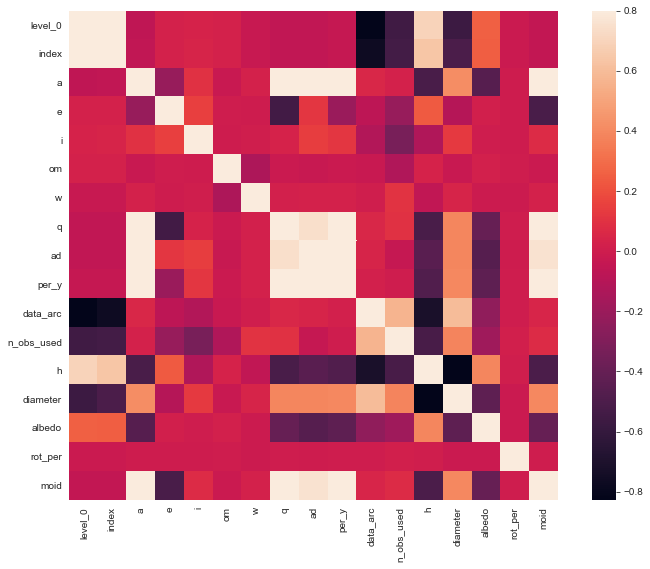

In [11]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

## Insights from the Heat-map

a, q, ad, per_y,moid, per: All these features share a strong correlation (Did someone say feature engineering?)
H is the only variable that shares a clear correlation with diameter 

In [12]:
# Dropping columns with low correlation
columns.remove("rot_per")
columns.remove("w")
columns.remove("om")
df = df[columns]
df.head()

,a,e,i,q,ad,per_y,data_arc,n_obs_used,h,diameter,albedo,moid
0,2.57425,0.19109,5.36699,2.08232,3.06617,4.13032,63431.0,2861.0,6.85,106.699,0.2740,1.09589
1,2.38533,0.23121,5.52365,1.83383,2.93684,3.68410,62452.0,5206.0,5.51,199.830,0.2766,0.84610
2,2.20176,0.15650,5.88695,1.85719,2.54634,3.26711,62655.0,2744.0,6.49,147.491,0.2260,0.87418
3,2.38564,0.12311,5.57682,2.09193,2.67934,3.68481,61821.0,2649.0,6.28,190.000,0.1180,1.10691
4,2.45311,0.10047,4.62989,2.20664,2.69958,3.84223,61699.0,5475.0,6.55,142.887,0.1910,1.19322


In [13]:
# Creating a target Dataset

df1 = df.copy()
y = df1.pop('diameter')
df1.head()

,a,e,i,q,ad,per_y,data_arc,n_obs_used,h,albedo,moid
0,2.57425,0.19109,5.36699,2.08232,3.06617,4.13032,63431.0,2861.0,6.85,0.2740,1.09589
1,2.38533,0.23121,5.52365,1.83383,2.93684,3.68410,62452.0,5206.0,5.51,0.2766,0.84610
2,2.20176,0.15650,5.88695,1.85719,2.54634,3.26711,62655.0,2744.0,6.49,0.2260,0.87418
3,2.38564,0.12311,5.57682,2.09193,2.67934,3.68481,61821.0,2649.0,6.28,0.1180,1.10691
4,2.45311,0.10047,4.62989,2.20664,2.69958,3.84223,61699.0,5475.0,6.55,0.1910,1.19322


<AxesSubplot:>

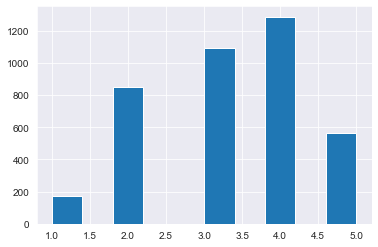

In [14]:
df['diameter_grp'] = pd.cut(df['diameter'],
                            bins=[0., 4., 8., 18., 60., np.inf], # diameter values 0-4 in grp 1, 4-8 in grp 2, etc. 
                            labels=[1, 2, 3, 4, 5]) # name of groups

df["diameter_grp"].hist() # shows the number of samples in each diameter group

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(test_size=0.2, random_state=1)
# Lets go with a smaller test size as we have a lot of data

for train_index, test_index in split.split(df, df['diameter_grp']):
    dftrain = df.loc[train_index]
    dftest =  df.loc[test_index]

# Creating a target Dataset
ytrain = dftrain.pop('diameter')
ytest = dftest.pop('diameter')
dftrain.head()

,a,e,i,q,ad,per_y,data_arc,n_obs_used,h,albedo,moid,diameter_grp
3567,2.27337,0.10684,1.54149,2.03048,2.51626,3.42779,17618.0,1848.0,14.10,0.2870,1.02206,1
27,2.99407,0.22559,7.93271,2.31864,3.66950,5.18086,58229.0,3165.0,8.50,0.0660,1.31998,5
1590,3.03686,0.09839,13.04974,2.73806,3.33566,5.29231,31575.0,2370.0,11.10,0.0560,1.74850,4
274,2.34003,0.08037,9.03281,2.15196,2.52809,3.57964,44131.0,2573.0,10.91,0.0502,1.18504,4
3079,2.45761,0.13135,5.70210,2.13480,2.78041,3.85281,24737.0,2372.0,12.70,0.2650,1.12881,2


In [16]:
ytrain.head()

3567      3.931
27      103.055
1590     33.810
274      39.030
3079      7.450
Name: diameter, dtype: float64

In [17]:
df['diameter_grp'].value_counts() / len(df) 

4    0.324420
3    0.275479
2    0.214682
5    0.142028
1    0.043391
Name: diameter_grp, dtype: float64

In [18]:
dftrain['diameter_grp'].value_counts() / len(dftrain) 

4    0.324503
3    0.275307
2    0.214759
5    0.141911
1    0.043519
Name: diameter_grp, dtype: float64

In [19]:
for set_ in(dftrain, dftest):
    set_.drop("diameter_grp", axis=1, inplace=True)
dftrain.head()

,a,e,i,q,ad,per_y,data_arc,n_obs_used,h,albedo,moid
3567,2.27337,0.10684,1.54149,2.03048,2.51626,3.42779,17618.0,1848.0,14.10,0.2870,1.02206
27,2.99407,0.22559,7.93271,2.31864,3.66950,5.18086,58229.0,3165.0,8.50,0.0660,1.31998
1590,3.03686,0.09839,13.04974,2.73806,3.33566,5.29231,31575.0,2370.0,11.10,0.0560,1.74850
274,2.34003,0.08037,9.03281,2.15196,2.52809,3.57964,44131.0,2573.0,10.91,0.0502,1.18504
3079,2.45761,0.13135,5.70210,2.13480,2.78041,3.85281,24737.0,2372.0,12.70,0.2650,1.12881


In [20]:
#  Creating scaled datasets

# It is suggested to scale data before using Lasso
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
sdftrain = scale.fit_transform(dftrain)
sdftest = scale.fit_transform(dftest)
sdftrain # All the values now lie between 0 to 1

array([[0.29361592, 0.11892974, 0.02327518, ..., 0.59115282, 0.28125   ,
        0.2419114 ],
       [0.44042999, 0.25254287, 0.1232099 , ..., 0.21581769, 0.05846774,
        0.31264617],
       [0.44914676, 0.10942212, 0.20322107, ..., 0.39008043, 0.0483871 ,
        0.41438913],
       ...,
       [0.46708753, 0.14921914, 0.22333742, ..., 0.22922252, 0.03326613,
        0.40855788],
       [0.27709501, 0.11029974, 0.06137244, ..., 0.53954424, 0.18245968,
        0.23294371],
       [0.31830154, 0.14772267, 0.15700047, ..., 0.51742627, 0.1875    ,
        0.26144703]])

In [21]:
# This widget helped me a lot to find relation between variables and detect Outliers
# Open in jupyter notebook, as you cannot access this in git
from ipywidgets import interactive
def size_widget(height=5.5, aspect=2.5, Y='diameter', X='ma', Kind='scatter'):
    sns.pairplot(df, hue='diameter_grp', palette='RdYlBu', x_vars=X, y_vars=Y, height=height, aspect=aspect, kind=Kind)

In [22]:
interactive(size_widget, X = columns, Y= columns,  height=(3, 10, 0.25), aspect=(0.6, 2.5, 0.5), Kind=['scatter','hist','reg','kde'])

interactive(children=(FloatSlider(value=5.5, description='height', max=10.0, min=3.0, step=0.25), FloatSlider(…

In [23]:
print("Skewness: %f" % df['diameter'].skew())
print("Kurtosis: %f" % df['diameter'].kurt())

Skewness: 2.603906
Kurtosis: 8.799813


In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


model = KNeighborsRegressor()
model.fit(sdftrain, ytrain)
pred = model.predict(sdftest)
pred

array([ 15.0502,  18.1468,  13.4614,  55.8258,   7.8814,  55.8162,
         9.7724,  15.8418,   8.1662,  89.1364,   4.0704,  14.4614,
        69.4828,   5.9282,  79.9748,   7.5994,  26.8614,  26.1112,
       115.2662,  30.1626,   5.9756,   6.3624,  27.5468,  25.6106,
        21.0916,  46.2686,  18.9618,  64.8822,   0.49  ,  83.5696,
        62.7392,   6.3876,  32.239 , 131.5626,  32.0038,  18.3826,
        15.4462, 131.3522,   7.6228,  43.736 ,  24.8648,  17.719 ,
        11.2548,   6.2808,   2.3768,  22.8474,  24.3118,  15.4768,
        20.9494,  20.9618,  81.7338,  21.0906, 113.1614,   8.7358,
         4.7778,  12.073 ,  25.2742,  62.5844,   6.9646,  42.1614,
        21.0714,  89.4612,  81.6346, 100.5354,  20.8364,  39.787 ,
         9.6458,  32.99  ,  17.3954,  25.9786,   9.589 ,  17.2386,
         7.1738,  72.252 ,  14.4966,   1.45  ,  46.6716,  21.1536,
         4.6902,  70.6904,  23.7562,  21.1584,  10.8888,  67.687 ,
        24.027 ,   4.9842,   8.72  ,  94.8838,  27.237 ,  22.0

In [25]:
knn_MSE = mean_squared_error(pred, ytest)
knn_RMSE = mean_squared_error(pred, ytest, squared=False)
knn_MAE = mean_absolute_error(pred, ytest)
print(knn_MSE)
print(knn_RMSE)
print(knn_MAE)

191.02259208907944
13.82109229001382
7.025135939470366
